In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import pickle
from sklearn.model_selection import GridSearchCV
import torch
from typing import List, Union
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
#check gpu
torch.cuda.is_available()

In [ ]:
from sentence_transformers import SentenceTransformer

# Pre-calculate embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2", device="cuda")

In [ ]:
abstracts = pd.read_csv("the reddit file")
embeddings = embedding_model.encode(abstracts, show_progress_bar=True)

In [3]:
import umap
from umap.umap_ import UMAP
umap_model = UMAP(n_neighbors=15, n_components=7, min_dist=0.0, metric='cosine', random_state=42)

In [13]:
from hdbscan import HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=500, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(stop_words="english", min_df=2, ngram_range=(1, 2))

In [9]:
from bertopic import BERTopic

In [ ]:
#training

from bertopic import BERTopic

topic_model = BERTopic(

  # Pipeline models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,

  # Hyperparameters
  top_n_words=10,
  verbose=True,
  calculate_probabilities=True,
  min_topic_size = 500
)

topics, probs = topic_model.fit_transform(abstracts, embeddings)

In [ ]:
##calculating probabilities

topic_distr, _ = topic_model.approximate_distribution(abstracts, window=8, stride=4)

In [71]:
#Next reduction of the bertopic results

freq_df = topic_model.get_topic_freq()
freq_df = freq_df.loc[freq_df.Topic != -1, :]
topics = sorted(freq_df.Topic.to_list())

# Load model to loaded_model

# Extract topic words and their frequencies
topic_list = sorted(topics)
frequencies = [topic_model.topic_sizes_[topic] for topic in topic_list]
words = [
    " | ".join([word[0] for word in topic_model.get_topic(topic)[:5]])
    for topic in topic_list
]

# Embed c-TF-IDF into 2D
all_topics = sorted(list(topic_model.get_topics().keys()))
indices = np.array([all_topics.index(topic) for topic in topics])

if topic_model.topic_embeddings_ is not None:
    embeddings = topic_model.topic_embeddings_[indices]
    embeddings = UMAP(
        n_neighbors=2, n_components=2, metric="cosine", random_state=42
    ).fit_transform(embeddings)
else:
    embeddings = topic_model.c_tf_idf_.toarray()[indices]
    embeddings = MinMaxScaler().fit_transform(embeddings)
    embeddings = UMAP(
        n_neighbors=2, n_components=2, metric="hellinger", random_state=42
    ).fit_transform(embeddings)


## Some code that can append sentiment
## Temporary fill in

#sent_temp = [random() for i in topic_list]

# Visualize with plotly
df = pd.DataFrame(
    {
        "x": embeddings[:, 0],
        "y": embeddings[:, 1],
        "Topic": topic_list,
        "Words": words,
        "Size": frequencies,
        "Sentiment": label_plot["negative"].to_list(),
    }
)

In [16]:
#for the clustering

from sklearn.metrics import davies_bouldin_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [ ]:
#-1 is bad, 1 is good
sil_3 = metrics.silhouette_score(df[['x','y']], CluNums, metric='euclidean')
sil_4 = metrics.silhouette_score(df[['x','y']], CluNums1, metric='euclidean')
sil_5 = metrics.silhouette_score(df[['x','y']], CluNums2, metric='euclidean')
sil_6 = metrics.silhouette_score(df[['x','y']], CluNums3, metric='euclidean')
sil_7 = metrics.silhouette_score(df[['x','y']], CluNums4, metric='euclidean')
sil_8 = metrics.silhouette_score(df[['x','y']], CluNums5, metric='euclidean')
sil_9 = metrics.silhouette_score(df[['x','y']], CluNums6, metric='euclidean')
sil_10 = metrics.silhouette_score(df[['x','y']], CluNums7, metric='euclidean')

score1 = np.stack((sil_3,sil_4,sil_5,sil_6,sil_7,sil_8,sil_9,sil_10))
score1

In [ ]:
#lower value is good
dav_3 = davies_bouldin_score(df[['x','y']], CluNums)
dav_4 = davies_bouldin_score(df[['x','y']], CluNums1)
dav_5 = davies_bouldin_score(df[['x','y']], CluNums2)
dav_6 = davies_bouldin_score(df[['x','y']], CluNums3)
dav_7 = davies_bouldin_score(df[['x','y']], CluNums4)
dav_8 = davies_bouldin_score(df[['x','y']], CluNums5)
dav_9 = davies_bouldin_score(df[['x','y']], CluNums6)
dav_10 = davies_bouldin_score(df[['x','y']], CluNums7)

score = np.stack((dav_3,dav_4,dav_5,dav_6,dav_7,dav_8,dav_9,dav_10))
score

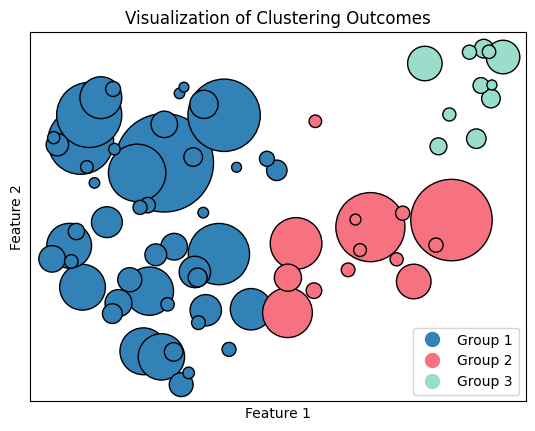

In [24]:
#visualization of clustered results

# Plot scatters for each group
df_1 = df2[df2["Group"] == '0']
plt.scatter(
    df_1["x"],
    df_1["y"],
    s=df_1["Size"] / 10,
    
    #alpha=0.75,
    edgecolors="black",
    color="#3282B8",
    label = "Group 1"
)

df_2 = df2[df2["Group"] == '1']
plt.scatter(
    df_2["x"],
    df_2["y"],
    s=df_2["Size"] / 10,
    
    #alpha=0.75,
    edgecolors="black",
    color="#F67280",
    label = "Group 2"
)

df_3 = df2[df2["Group"] == '2']
plt.scatter(
    df_3["x"],
    df_3["y"],
    s=df_3["Size"] / 10,
    
    #alpha=0.75,
    edgecolors="black",
    color="#99DDCC",
    label = "Group 3"
)

# Show final plot
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.gca().axes.xaxis.set_ticks([])
plt.gca().axes.yaxis.set_ticks([])
#plt.title("Circle Scatter Plot with Sentiment Colors")
plt.title("Visualization of Clustering Outcomes")

legend1 = mlines.Line2D([], [], color='#3282B8', marker='o', linestyle='None', markersize=10, label='Group 1')
legend2 = mlines.Line2D([], [], color='#F67280', marker='o', linestyle='None', markersize=10, label='Group 2')
legend3 = mlines.Line2D([], [], color='#99DDCC', marker='o', linestyle='None', markersize=10, label='Group 3')

# 범례 설정
plt.legend(handles=[legend1, legend2, legend3], loc="lower right")

plt.show()

C:\Users\dongyunlee\AppData\Local\Temp\ipykernel_77476\1893583217.py:17: MatplotlibDeprecationWarning:

Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.



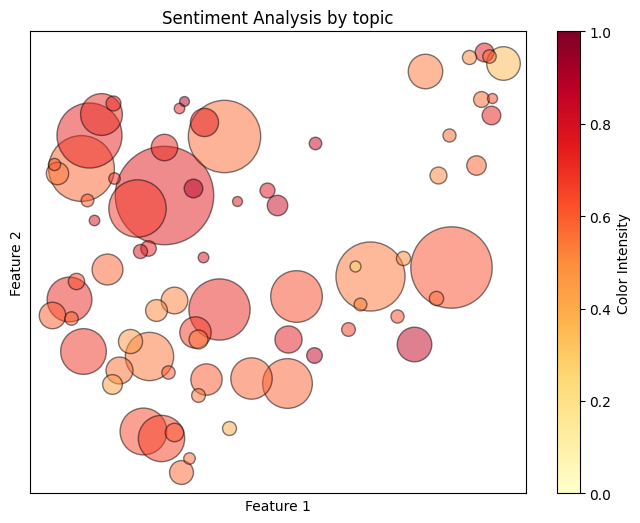

In [59]:
# visualization of sentiment

colors = cm.YlOrRd(df["Sentiment"])


plt.figure(figsize=(8, 6))
for i in range(len(df)):
    plt.scatter(df["x"][i], df["y"][i], s=df["Size"][i]/10, color=colors[i], alpha = 0.5, edgecolors = 'black')

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=cm.YlOrRd, norm=plt.Normalize(0, 1))
sm.set_array([])
colorbar = plt.colorbar(sm)
colorbar.set_label('Color Intensity')

# Set labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.gca().axes.xaxis.set_ticks([])
plt.gca().axes.yaxis.set_ticks([])
#plt.title("Circle Scatter Plot with Sentiment Colors")
plt.title("Sentiment Analysis by topic")




plt.show()

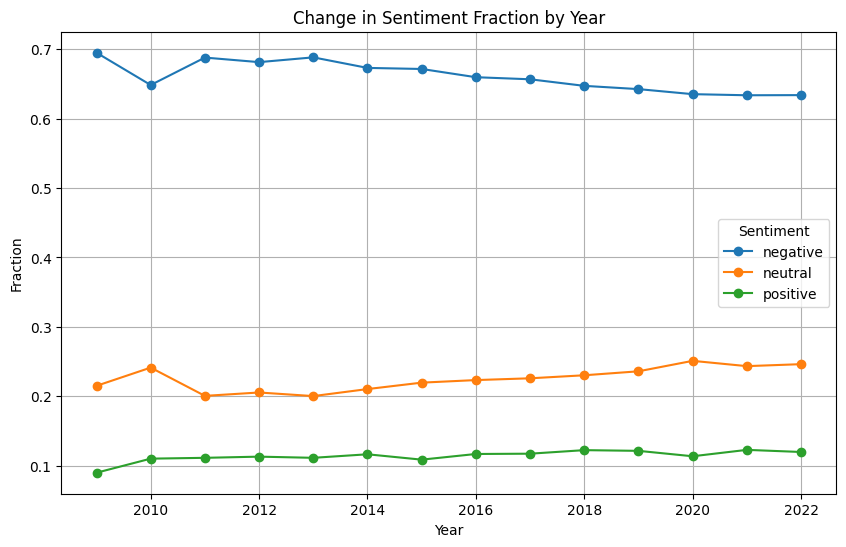

In [25]:
##visulization of sentiment trend


# Extract year from created_utc and groupby year and label to get count of each label per year
filter_group['year'] = pd.to_datetime(filter_group['created_utc']).dt.year
label_counts = filter_group.groupby(['year', 'label']).size().unstack(fill_value=0)

# Normalize to get fraction
label_fraction = label_counts.div(label_counts.sum(axis=1), axis=0)

# Plot
label_fraction.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Change in Sentiment Fraction by Year')
plt.ylabel('Fraction')
plt.xlabel('Year')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()